In [1]:
import os
import numpy as np
import scipy.sparse
import scipy.io
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import numpy as np
import scanpy as sc
import pandas as pd


In [2]:
dir_path = "/home/krushna/Documents/Data_integration/SCRNA_Datasets/All_h5ad/"
def load_data(dataset,batch):
    adata =sc.read_h5ad(dir_path+dataset+'.h5ad')
    sc.pp.filter_genes(adata, min_counts=3)
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.raw = adata
    sc.pp.highly_variable_genes(
            adata,
            flavor="seurat",
            n_top_genes=2000,
            layer="counts",
            batch_key=batch,
            subset=True
    )
    return adata
batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Tabula_Muris' : "batch",
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 "Tabula_Muris" : "cell_ontology_class",
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }    
emb_folder = "/home/krushna/Documents/Data_integration/Othermethods/insct/embeddings/"

In [3]:
embeddings = 'Immune_Human_removed_top_cells_tnn_embeddings'+'.csv'
dataset = 'Immune_Human_removed_top_cells'
batch = 'batch'
cell_type = 'final_annotation'
adata = load_data(dataset,batch)
emb_path = emb_folder + embeddings 
final_embedings=pd.read_csv(emb_path, sep=',',header=None).values
adata.obsm['final_embeddings'] = final_embedings

Clustering...
use rep: final_embeddings
0.0001 1
0.0790421052631579 9
0.15798421052631578 16
0.23692631578947368 19
0.3158684210526316 21
0.3948105263157895 26
0.47375263157894737 27
0.5526947368421052 28
0.6316368421052632 32
0.7105789473684211 32
0.789521052631579 38
0.8684631578947368 41
0.9474052631578948 41
1.0263473684210527 43
1.1052894736842105 45
1.1842315789473685 45
1.2631736842105263 48
1.3421157894736842 49
1.4210578947368422 51
1.5 54


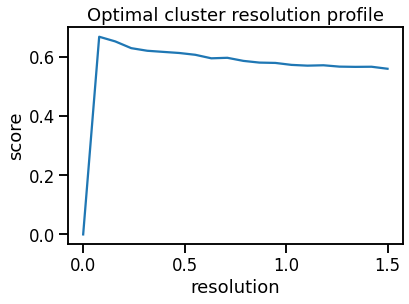

NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
use rep: final_embeddings
0.0001 1
0.0790421052631579 9
0.15798421052631578 16
0.23692631578947368 19
0.3158684210526316 21
0.3948105263157895 26
0.47375263157894737 27
0.5526947368421052 28
0.6316368421052632 32
0.7105789473684211 32
0.789521052631579 38
0.8684631578947368 41
0.9474052631578948 41
1.0263473684210527 43
1.1052894736842105 45
1.1842315789473685 45
1.2631736842105263 48
1.3421157894736842 49
1.4210578947368422 51
1.5 54
Isolated labels ASW...
Graph connectivity...
kBET...
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 9
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Add

In [4]:
import scIB
results,ilisi_all,clisi_all,kbet_all  =   scIB.metrics.metrics(                
                adata,
                adata,
                batch_key = batch, #need to change according
                label_key = cell_type, #need to change according
                hvg_score_=False,
                cluster_key='cluster',
                cluster_nmi=None,
                ari_=True,
                nmi_=True,
                nmi_method='arithmetic',
                nmi_dir=None,
                silhouette_=True,
                embed= 'final_embeddings', #need to change according 
                si_metric='euclidean',
                pcr_=True,
                cell_cycle_=False,
                organism='mouse',
                isolated_labels_=True,  # backwards compatibility
                isolated_labels_f1_=True,
                isolated_labels_asw_=True,
                n_isolated=None,
                graph_conn_=True,
                kBET_=True,
                kBET_sub=0.5,
                lisi_graph_=True,
                lisi_raw=True,
                trajectory_=False,
                type_=None,
                verbose=False,
        )

In [5]:
results

,0
NMI_cluster/label,0.667957
ARI_cluster/label,0.467367
ASW_label,0.584927
ASW_label/batch,0.716302
PCR_batch,0.385214
cell_cycle_conservation,NaN
isolated_label_F1,0.645833
isolated_label_silhouette,0.495664
graph_conn,0.779300
kBET,0.402502


In [6]:
import numpy as np
np.savetxt(dataset+"_ilisi.csv", ilisi_all, delimiter=",")
np.savetxt(dataset+"_clisi.csv", clisi_all, delimiter=",")
np.savetxt(dataset+"_kbet_all.csv",np.concatenate([np.array(val).reshape(1,-1) for val in kbet_all],axis = 0), delimiter=',')

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi


latent_matrix = adata.obsm['final_embeddings'] 
labels = np.array(adata.obs[cell_type] )
K = np.size(np.unique(labels))
kmeans = KMeans(n_clusters=K, random_state=0).fit(latent_matrix)
y_pred = kmeans.labels_

print('Computing NMI ...')
NMI = nmi(labels.flatten(), y_pred.flatten())
print('NMI = {}'.format(NMI))

Computing NMI ...
NMI = 0.6583724730616366


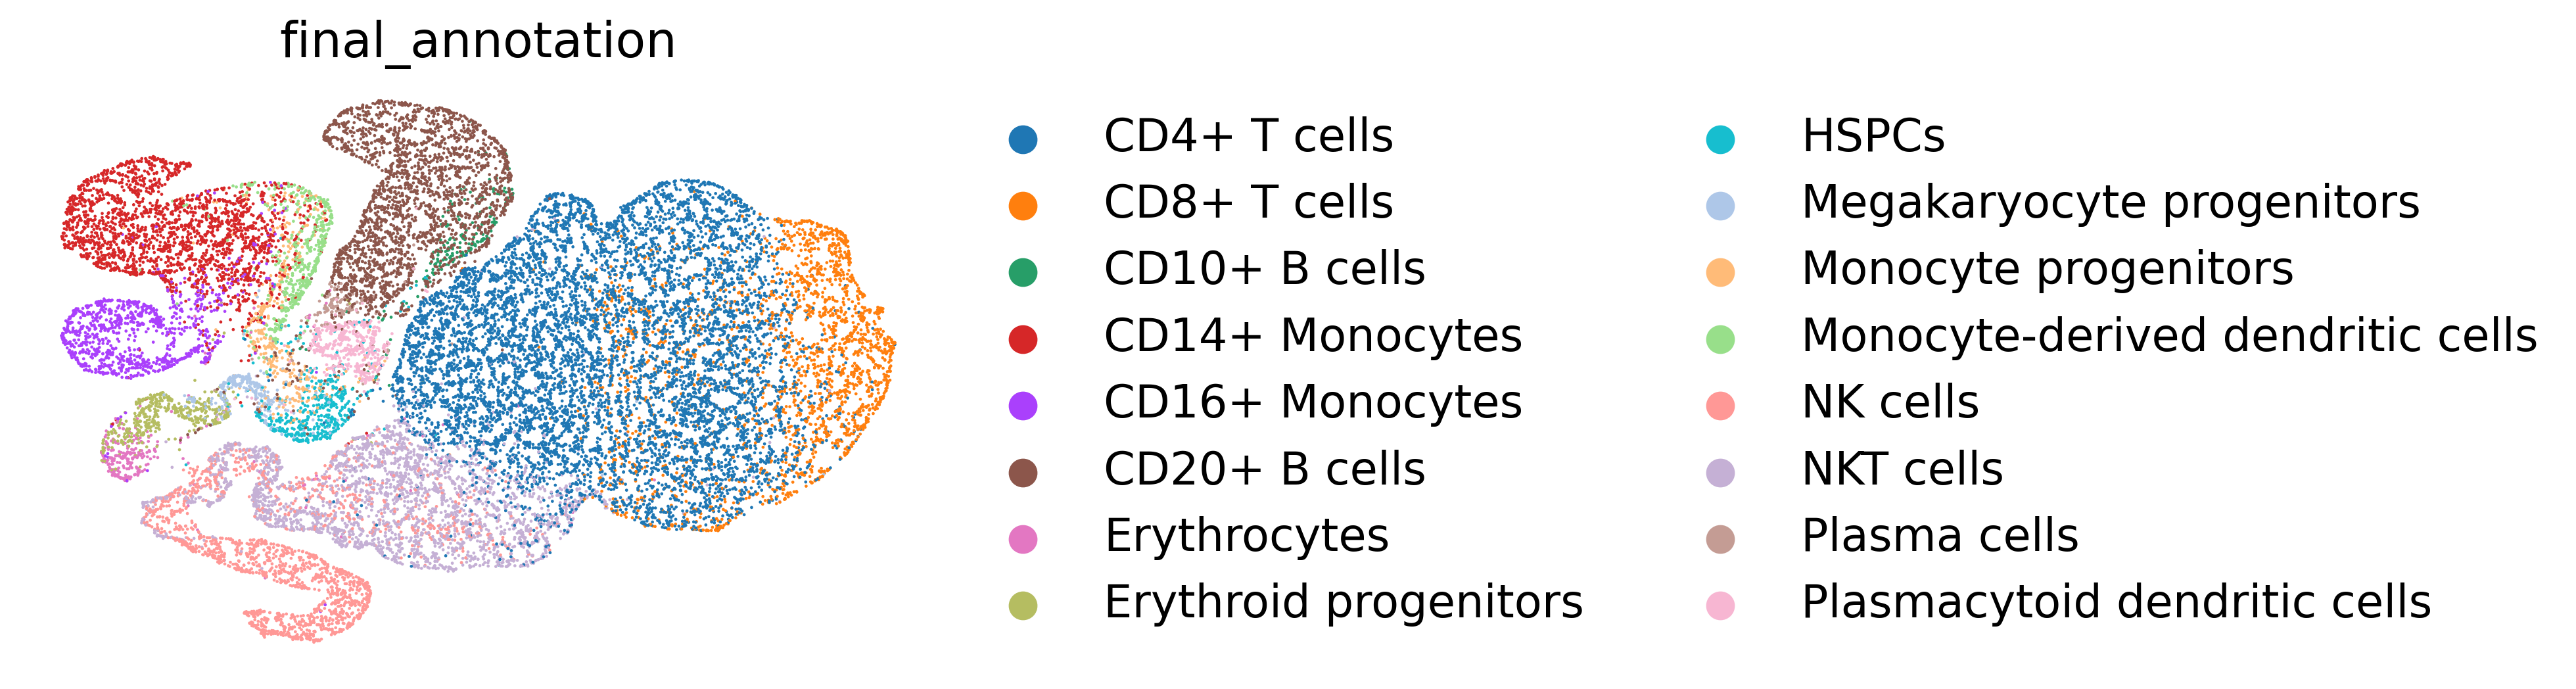

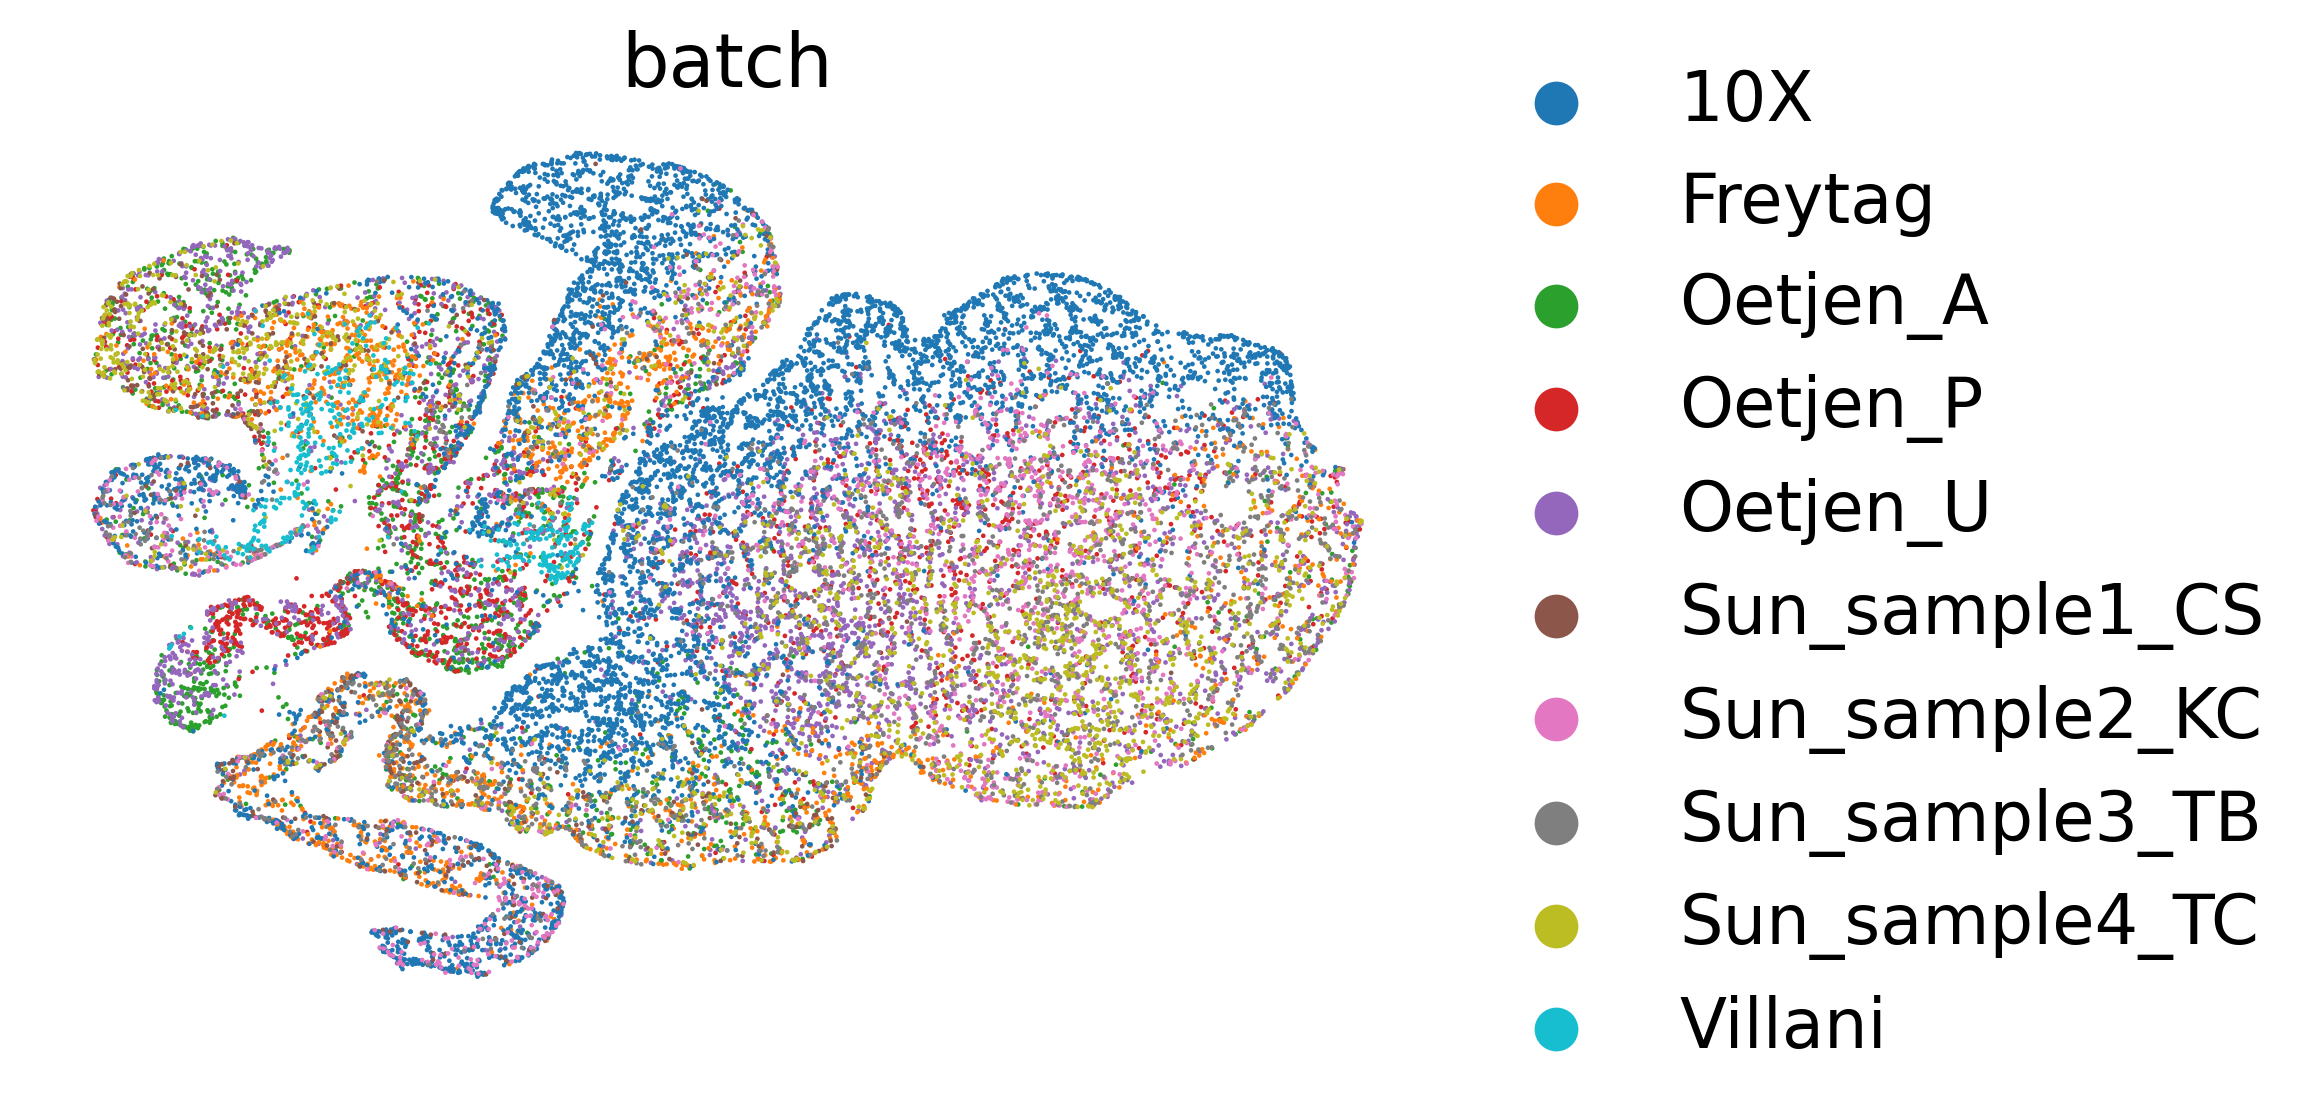

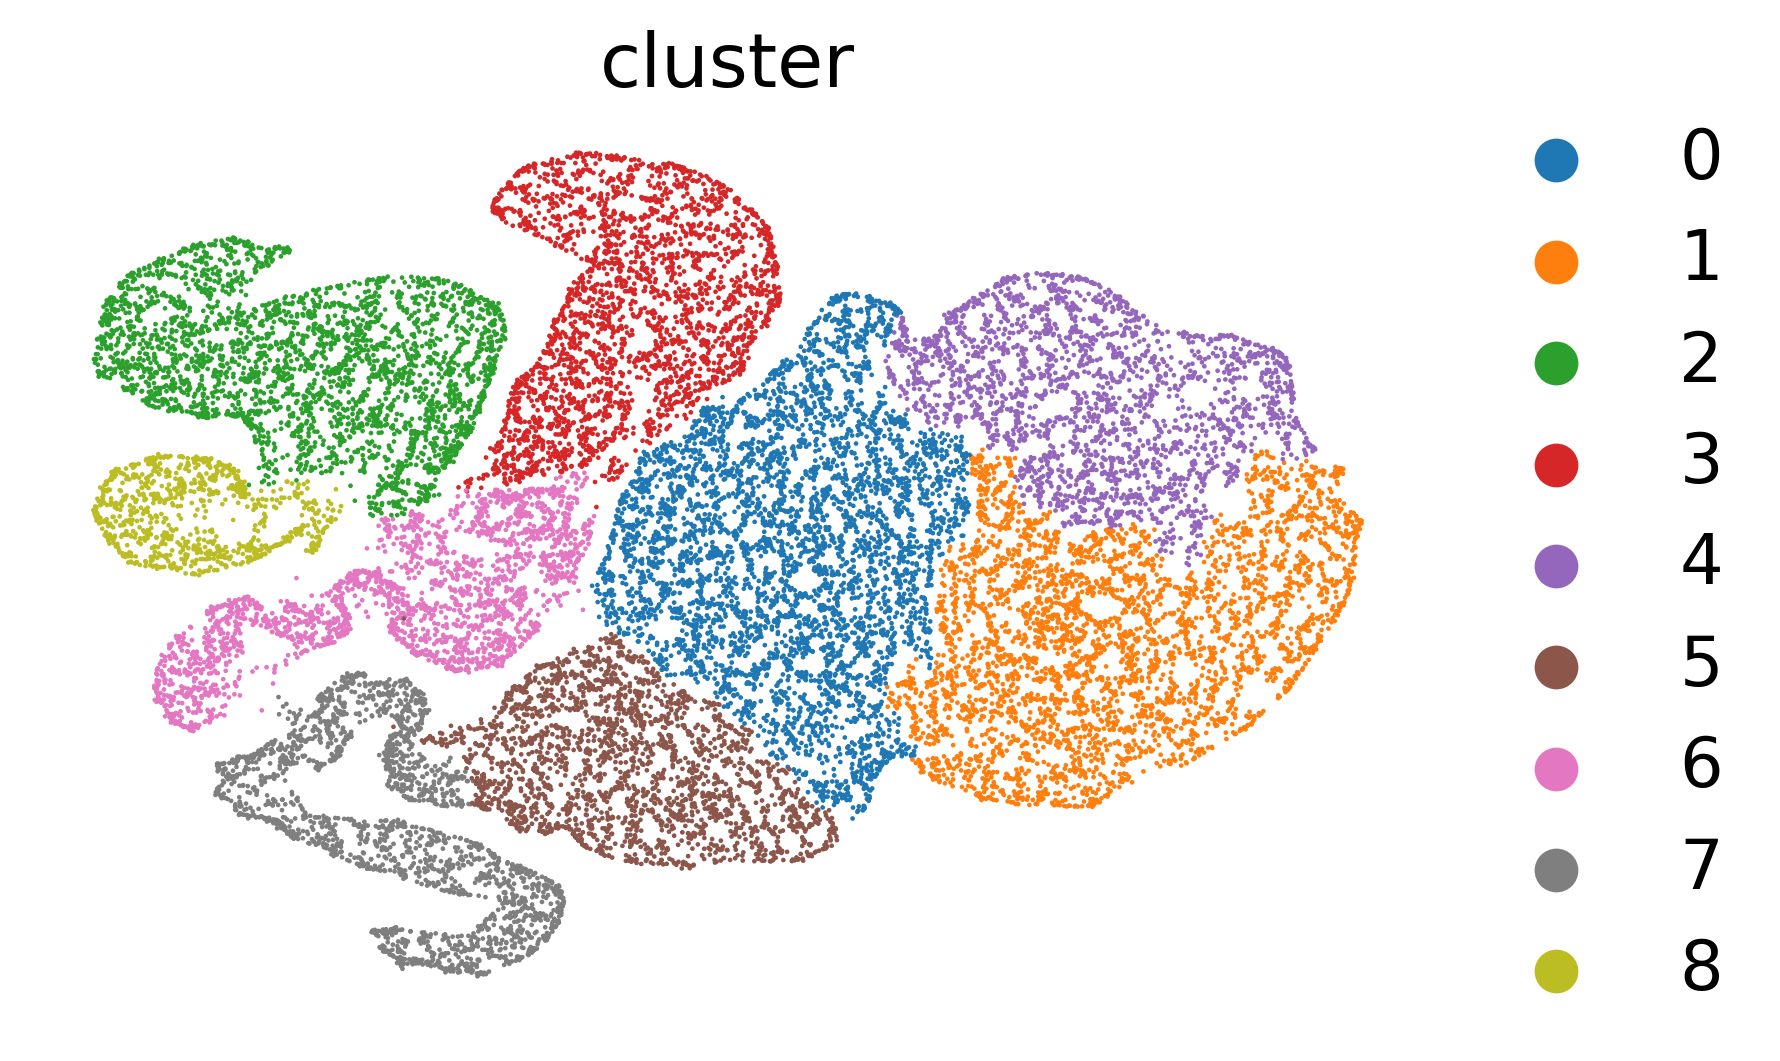

In [9]:
sc.pp.neighbors(adata, use_rep='final_embeddings')  # use_rep = 'final_embeddings'
sc.tl.umap(adata)
sc.pl.umap(adata, color=cell_type, frameon=False)
sc.pl.umap(adata, color=batch, frameon=False)
sc.pl.umap(adata, color='cluster', frameon=False)